<a href="https://colab.research.google.com/github/mvdheram/Stereotypical-Social-bias-detection-/blob/Pre-trained-LM-selection-and-training/Multi_label_Language_Model_training_Ktrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-label dataset 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

multi_class = pd.read_csv('/content/exp5_multi_class_imbalance_handled.csv', index_col=0) 
multi_label = pd.read_csv('/content/multi_label_explicit_corrected.csv', index_col=0)

In [ ]:
multi_class.bias_type.value_counts()

anti-stereotype    5737
unrelated          4229
Ethnicity          2613
religion           1953
profession         1557
gender             1012
Name: bias_type, dtype: int64

In [ ]:
multi_label.Type.value_counts()

Anti-stereotype    5443
stereotype         5443
Name: Type, dtype: int64

In [ ]:
multi_label.bias_type.value_counts()

Ethnicity     5226
profession    3112
gender        2024
religion       524
Name: bias_type, dtype: int64

Extract religion bias and merge into multi-label

In [ ]:
religion = multi_class.loc[multi_class['bias_type'] == 'religion']

In [ ]:
religion.reset_index(drop = True,inplace=True)

In [ ]:
religion = religion.assign(Type = "stereotype")

In [ ]:
religion1 = multi_label[multi_label.bias_type != 'religion']

In [ ]:
multi_label_imbalance_handled = pd.concat([religion1,religion])

In [ ]:
multi_label_imbalance_handled.bias_type.value_counts()

Ethnicity     5226
profession    3112
gender        2024
religion      1953
Name: bias_type, dtype: int64

Add 'Unrelated' to multi-label dataset

In [ ]:
unrelated = multi_class.loc[multi_class['bias_type'] == 'unrelated']

In [ ]:
unrelated.reset_index(drop = True,inplace=True)

In [ ]:
unrelated = unrelated.rename(columns= {'bias_type':'Type'})

In [ ]:
unrelated

,Type,sentence
0,unrelated,Cats have sharp claws.
1,unrelated,The knee was bruised
2,unrelated,The wind is blowing at 80 mph.
3,unrelated,My dog bit me yesterday.
4,unrelated,"Last night, I had Asian food for dinner."
...,...,...
4224,unrelated,Arab people are associated with hi.
4225,unrelated,Car was a new chemist in our lab.
4226,unrelated,"The gentlemen stood around the fire, carefully..."
4227,unrelated,The common ukrainian is a supporter of a floun...


In [ ]:
multi_label_imbalance_handled = pd.concat([multi_label_imbalance_handled,unrelated])

In [ ]:
multi_label_imbalance_handled

,bias_type,Type,sentence,unrelated
0,Ethnicity,stereotype,Many people live in Ethiopia. The people are v...,NaN
1,Ethnicity,stereotype,My professor is a hispanic man He came here il...,NaN
2,gender,stereotype,The schoolgirl is walking down the street. She...,NaN
3,Ethnicity,stereotype,We'll likely fly over Cape Verde on our flight...,NaN
4,Ethnicity,stereotype,I know many people who are Russian. They love ...,NaN
...,...,...,...,...
4224,NaN,unrelated,Arab people are associated with hi.,NaN
4225,NaN,unrelated,Car was a new chemist in our lab.,NaN
4226,NaN,unrelated,"The gentlemen stood around the fire, carefully...",NaN
4227,NaN,unrelated,The common ukrainian is a supporter of a floun...,NaN


In [ ]:
multi_label_imbalance_handled.bias_type.value_counts()

Ethnicity     5226
profession    3112
gender        2024
religion      1953
Name: bias_type, dtype: int64

In [ ]:
multi_label_imbalance_handled.Type.value_counts()

unrelated          12687
stereotype          7134
Anti-stereotype     5181
Name: Type, dtype: int64

In [ ]:
multi_label_imbalance_handled.to_csv('multi_label_imbalance_handled.csv')

Convert into multi-label 

In [ ]:
# df = pd.read_csv('/content/multi_label_imbalance_handled1.csv', index_col=0)

In [5]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Trained_models/mult_label_dataset/Unrelated_samples_adjusted/Multi_label_stereo.csv', index_col=0)

In [4]:
df.fillna(value='others',inplace=True)

In [5]:
y = df.iloc[:,:-1].values
X = df.iloc[:,-1].values

In [6]:
X

array(['Many people live in Ethiopia. The people are very thin and good at distance running.',
       'My professor is a hispanic man He came here illegally',
       'The schoolgirl is walking down the street. She is a target for child predators.',
       ...,
       'Biking out is an economical energy-efficient mode<unk> of transportation.',
       'I might see the little dog is a still in need of food, I will go to through the park grocery store and get him find some food and get treats.',
       'going to the California beach in the morning  which is so so cool'],
      dtype=object)

In [7]:
y

array([['Ethnicity', 'stereotype'],
       ['Ethnicity', 'stereotype'],
       ['gender', 'stereotype'],
       ...,
       ['others', 'unrelated'],
       ['others', 'unrelated'],
       ['others', 'unrelated']], dtype=object)

In [9]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1])], remainder='passthrough')
df_ohe = np.array(ct.fit_transform(df))

In [10]:
LABEL_COLUMNS = ['Ethnicity','gender','others','profession','religion','Anti-stereotype','stereotype','unrelated', 'sentence']

In [11]:
df_ohe = pd.DataFrame(df_ohe, columns= LABEL_COLUMNS)

In [ ]:
ct.get_feature_names()

In [13]:
df_ohe 

,Ethnicity,gender,others,profession,religion,Anti-stereotype,stereotype,unrelated,sentence
0,1,0,0,0,0,0,1,0,Many people live in Ethiopia. The people are v...
1,1,0,0,0,0,0,1,0,My professor is a hispanic man He came here il...
2,0,1,0,0,0,0,1,0,The schoolgirl is walking down the street. She...
3,1,0,0,0,0,0,1,0,We'll likely fly over Cape Verde on our flight...
4,1,0,0,0,0,0,1,0,I know many people who are Russian. They love ...
...,...,...,...,...,...,...,...,...,...
16555,0,0,1,0,0,0,0,1,Cookies are good substitutes with liquid milk.
16556,0,0,1,0,0,0,0,1,Jollof - Rice cereal is totally better than Ja...
16557,0,0,1,0,0,0,0,1,Biking out is an economical energy-efficient m...
16558,0,0,1,0,0,0,0,1,I might see the little dog is a still in need ...


In [14]:
df_ohe.drop(columns=['others'], inplace=True)

In [16]:
df_ohe.to_csv('/content/drive/MyDrive/Trained_models/mult_label_dataset/Unrelated_samples_adjusted/ohe_multilabel.csv')

# Language models
 

Algorithm (Ktrain):

1. Load the the multi-label dataset
2. Show/visualize class imbalance 
  * Use focal loss or 
  * Use class weights 
3. Use stratification to split the data into train, val ,test 
4. Pre-process the data and build a transformer model (Ktrain) by instantiating a transformer model from huggingface with text classification head.
    * **Transformer details** :
        * Tokenizer and encoding : 
            * Load pre-trained tokenizer to split the text into 
            * Tokens 
            * Add special tokens to indicate the starting and end of the text sequence which is specific to language model 
            * Use the `vocab` file of pre-trained tokenizer to index the tokenized text. 
            * To to these steps for several/batch of sentences at a time, `batch_encoding` is used  where the batch of sentences (list of lists) needs to be 
              * Padded to the maximum length in the batch (for GPU)
              * Truncate each sentence to maximum length a model can accept
              * To return tensors (higher dimentional arrays)
    * **Ktrain** (`text.Transformer, ktrain.get_learner()`)
        * Use ktrain/tranformer (preproc - Preprocessor instance) to handle the data pre-processing which is specific to the transformer model.
        * Wraps the preprocessed steps and model ( By removing the pre-training head used to train language model and replace with classification head for classification) to builds a learner object whose constructor takes the following arguments  
          * Pre-processed (Tokenized, encoded) train and validation data
          * Batch_size (batch encoding)
          * Model with classification head 
5. Estimate learning rate
  * The default Optimizer is AdamW (Technique  for weight updates per batch)
6. Train model using learning rate scheduler  
  * The learning rate scheduler which is used to schedule/vary the rate of learning per batch (degree to which weights are adjusted during training, useful to minimize loss and improve generalization).
  * Learning rate finder (ktrain) (`learner.lr_find(show_plot = True, max_epoch = 2`)
    * To find the learning rate and loss visualization for the specific dataset - (Ktrain)
  *  Learning rate scheduler (ktrain)
    * Triangular learning rate policy - using `autofit` 
    * 1cycle policy - using `fit_onecycle`
    * SGDR (Stochastic Gradient Descent with Restart) - using `fit` method by supplying `cycle_len` argument.
7. Evaluate the model using `learner.validate(class_names = LABELS)`, ktrain which produces a classification report.
8. View loss using `learner.view_top_losses(n=5, preproc = text.transformer (Model_name, maxlen, class_names)`
9. Make Predictions on New data in deplyment 
  * Load  predictor with `ktrain.get_predictor(learner.model, preproc)`
  * Predict using predictor.predict('sentence')
10. Explain the predictions 
  * Input features which corresponds to tokens in text sequence, which are attended/ important for classification are visualized using LIME.  
  * "The input is randomly perturbed to examine how the prediction changes. This is used to infer the relative importance of different words to the final prediction using a linear interpretable model."

Link :
  1. Ktrain transformers training : https://github.com/amaiya/ktrain/blob/master/examples/text/20newsgroup-distilbert.ipynb
  2. Transformers training : https://huggingface.co/transformers/training.html
  3. Learning rate scheduler-ktrain : https://nbviewer.jupyter.org/github/amaiya/ktrain/blob/master/tutorials/tutorial-02-tuning-learning-rates.ipynb
  4. Explaining misclassification : https://nbviewer.jupyter.org/github/amaiya/ktrain/blob/master/tutorials/tutorial-A2-explaining-predictions.ipynb 
  5. Transformer models : https://huggingface.co/models


## Data-loading

In [1]:
!pip install ktrain --quiet

     |████████████████████████████████| 25.3 MB 96 kB/s 
     |████████████████████████████████| 6.8 MB 36.9 MB/s 
     |████████████████████████████████| 981 kB 38.5 MB/s 
     |████████████████████████████████| 263 kB 40.1 MB/s 
     |████████████████████████████████| 1.9 MB 35.3 MB/s 
     |████████████████████████████████| 1.2 MB 33.8 MB/s 
     |████████████████████████████████| 468 kB 36.5 MB/s 
     |████████████████████████████████| 895 kB 35.1 MB/s 
     |████████████████████████████████| 3.3 MB 29.0 MB/s 


In [2]:
import ktrain
from ktrain import text
import pandas as pd

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Trained_models/mult_label_dataset/Unrelated_samples_adjusted/ohe_multilabel.csv', index_col = 0)

In [7]:
df

,Ethnicity,gender,profession,religion,Anti-stereotype,stereotype,unrelated,sentence
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Many people live in Ethiopia. The people are v...
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,My professor is a hispanic man He came here il...
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,The schoolgirl is walking down the street. She...
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,We'll likely fly over Cape Verde on our flight...
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,I know many people who are Russian. They love ...
...,...,...,...,...,...,...,...,...
16555,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Cookies are good substitutes with liquid milk.
16556,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Jollof - Rice cereal is totally better than Ja...
16557,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Biking out is an economical energy-efficient m...
16558,0.0,0.0,0.0,0.0,0.0,0.0,1.0,I might see the little dog is a still in need ...


In [10]:
y = df.iloc[:,:-1].values
X = df.iloc[:,-1].values

In [11]:
X

array(['Many people live in Ethiopia. The people are very thin and good at distance running.',
       'My professor is a hispanic man He came here illegally',
       'The schoolgirl is walking down the street. She is a target for child predators.',
       ...,
       'Biking out is an economical energy-efficient mode<unk> of transportation.',
       'I might see the little dog is a still in need of food, I will go to through the park grocery store and get him find some food and get treats.',
       'going to the California beach in the morning  which is so so cool'],
      dtype=object)

In [12]:
y

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [13]:
MAX_LEN = 50
RANDOM_SEED = 47

In [14]:
from sklearn.model_selection import train_test_split

train_df_text, test_df_text, train_df_labels,test_df_labels = train_test_split(X,y, test_size=0.3, random_state=RANDOM_SEED, stratify = y)
val_df_text, test_df_text, val_df_labels,test_df_labels = train_test_split(test_df_text,test_df_labels, test_size=0.5, random_state=RANDOM_SEED,stratify = test_df_labels)

In [15]:
LABELS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']

## Classification metrics

In [76]:
def Accuracy(y_true, y_pred):
  temp = 0
  for i in range(y_true.shape[0]):
      temp += sum(np.logical_and(y_true[i], y_pred[i])) / sum(np.logical_or(y_true[i], y_pred[i]))
  return temp / y_true.shape[0]

In [77]:
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report,hamming_loss, roc_auc_score, accuracy_score,multilabel_confusion_matrix, precision_recall_fscore_support
import numpy as np
import json

upper, lower = 1, 0
LABELS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']

def classification_metrics(test_pred,labels,model_name,threshold):

  print("Evaluation metrics for test set:")
  y_pred = np.where(test_pred > threshold, upper, lower)

  ROC_AUC_score = roc_auc_score(test_df_labels, test_pred)
  accuracy = accuracy_score(labels, y_pred)
  hloss = hamming_loss(labels, y_pred)
  hscore = Accuracy(labels, y_pred)

  precision_sample_average = precision_score(y_true=labels, y_pred=y_pred, average='samples')
  recall_sample_average = recall_score(y_true=labels, y_pred=y_pred, average='samples')
  f1_sample_average= f1_score(y_true=labels, y_pred=y_pred, average='samples')

  cr = classification_report(labels, y_pred, labels=list(range(len(LABELS))), target_names=LABELS, output_dict=True)
  cf = multilabel_confusion_matrix(test_df_labels, 
  y_pred)

  model_metrics = {}
  model_metrics["AUC_ROC_score"] = ROC_AUC_score
  model_metrics["subset_accuracy"] = accuracy
  model_metrics["hamming_loss"]= hloss
  model_metrics["hamming_score"] = hscore

  model_metrics['sample_average_precision'] = precision_sample_average
  model_metrics['sample_average_recall'] = recall_sample_average
  model_metrics['sample_average_f1'] = f1_sample_average


  if write_to_file:
    model_metrics["Classification_report"] = cr

    for i,val in enumerate(LABELS):
      model_metrics['confusion_matrix' + '_' + val] = str(cf[i].flatten())
  
    model_metrics["y_pred"] = str(y_pred)
    model_metrics["y_labels"] = str(test_df_labels)


    if threshold != 0.5:
      th = "calculated_threshold"
    else:
      th = threshold

    model_metrics["threshold"] = th
    output_file = "eval_results_" + model_name + "_"+str(th) +"_"+ ".json"
    
    with open(output_file, "w" ) as writer:
        json.dump(model_metrics,writer)
  

  print("\n ROC-AUC score: %.6f \n" % (ROC_AUC_score))
  print("\n Subset accuracy : %.6f \n" % (accuracy))
  print("\n hamming_loss : %.6f \n" % (hloss))
  print("\n hamming score : %.6f \n" % hscore)
  print("\n sample average  precision_sample_average : %.6f \n" % precision_sample_average)
  print("\n sample average  recall_sample_average : %.6f \n" % recall_sample_average)
  print("\n sample average  f1_sample_average : %.6f \n" % f1_sample_average)
  

  print("  Saving the metrics into a file: " + output_file + " with threshold :" + str(threshold))

## RoBERTa - base

In [18]:
# Number of epochs 
N_EPOCHS = 5

# Batch_size 
BATCH_SIZE = 8

# Model name 
MODEL_NAME = 'roberta-base'

# Learning rate 
learning_rate = 3.404460046972836e-05

In [19]:
transformer_model = text.Transformer(MODEL_NAME, maxlen= 100,class_names= LABELS)

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [20]:
train = transformer_model.preprocess_train(train_df_text,train_df_labels)
validation = transformer_model.preprocess_test(val_df_text,val_df_labels)
test = transformer_model.preprocess_test(test_df_text,test_df_labels)

preprocessing train...
language: en
train sequence lengths:
	mean : 12
	95percentile : 24
	99percentile : 33


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Is Multi-Label? True
preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 25
	99percentile : 35


preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 24
	99percentile : 36


In [21]:
trans_classifier = transformer_model.get_classifier()

Downloading:   0%|          | 0.00/657M [00:00<?, ?B/s]

In [22]:
learner = ktrain.get_learner(trans_classifier,train_data = train,val_data= validation, batch_size= BATCH_SIZE)

In [23]:
learner.fit_onecycle(learning_rate, N_EPOCHS)



begin training using onecycle policy with max lr of 3.404460046972836e-05...
Epoch 1/5
1449/1449 [==============================] - 604s 403ms/step - loss: 0.3124 - accuracy: 0.6572 - val_loss: 0.2078 - val_accuracy: 0.8800
Epoch 2/5
1449/1449 [==============================] - 585s 401ms/step - loss: 0.1824 - accuracy: 0.8718 - val_loss: 0.1967 - val_accuracy: 0.8760
Epoch 3/5
1449/1449 [==============================] - 585s 402ms/step - loss: 0.1567 - accuracy: 0.8822 - val_loss: 0.1611 - val_accuracy: 0.9167
Epoch 4/5
1449/1449 [==============================] - 585s 401ms/step - loss: 0.1221 - accuracy: 0.8988 - val_loss: 0.1517 - val_accuracy: 0.8716
Epoch 5/5
1449/1449 [==============================] - 584s 401ms/step - loss: 0.0866 - accuracy: 0.8830 - val_loss: 0.1556 - val_accuracy: 0.8788


In [24]:
predictor = ktrain.get_predictor(learner.model,preproc=transformer_model)

In [25]:
predictor.save('/content/drive/MyDrive/Trained_models/mult_label_dataset/Unrelated_samples_adjusted/Ktrain_Roberta_Bert/%s'% (MODEL_NAME))

### Evaluation Metrics

Threshold :
  * When using sigmoid activation function, the values range of [0,1], as a rule of thumb 0.5 is used as threshold

1. AUC_ROC
  * Per class auc score 
  * Determine threshold using `auc_roc` metric
2. Accuracy (subset accuracy/ Exact match accuracy):
  * Avoids partial matches in the case of multi-label classification 
3. Hamming loss : Fraction/average of correctly predicted labels (per label, per class total correct predictions).
4. Classification report with threshold 


#### ROC_AUC_Score (validation set)

In [26]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(val_df_labels, learner.predict())
print("\n ROC-AUC score: %.6f \n" % (score))


 ROC-AUC score: 0.971252 



Evaluation on validation set


In [33]:
val_pred = learner.predict()
val_labels = val_df_labels

In [34]:
write_to_file = True
classification_metrics(val_pred,val_labels,MODEL_NAME,0.5)

Evaluation metrics for test set:

 ROC-AUC score: 0.496305 


 Subset accuracy : 0.779388 


 hamming_loss : 0.064987 


 hamming score : 0.848866 


 sample average  precision_sample_average : 0.883119 


 sample average  recall_sample_average : 0.881844 


 sample average  f1_sample_average : 0.881643 

  Saving the metrics into a file: eval_results_Roberta_base_0.5_.json with threshold :0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### ROC (test set)

In [35]:
test_pred = predictor.predict(test_df_text, return_proba= True)

##### Per-class ROC_AUC 

In [36]:
from sklearn.metrics import roc_curve
from collections import OrderedDict
import numpy as np


opti_threshold = dict()
LABEL_COLUMNS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']

for i in range(7):
  fpr, tpr, thresholds = roc_curve(test_df_labels[:,i], test_pred[:,i])
  print("AUC_ROC_score of %s is %s:"% (LABEL_COLUMNS[i],roc_auc_score(test_df_labels[:,i], test_pred[:,i])))
  optimal_idx = np.argmax(tpr + (1- fpr)) # Return indices of maximum array;  Criterion - Maximise TPR(recall) and TNR(specificity) 
  optimal_threshold = thresholds[optimal_idx]
  print("Optimal threshold value of %s is %s:\n" % (LABEL_COLUMNS[i], optimal_threshold))
  opti_threshold[i] = optimal_threshold

AUC_ROC_score of Ethnicity is 0.9973461884753901:
Optimal threshold value of Ethnicity is 0.14274646:

AUC_ROC_score of gender is 0.9922848261709319:
Optimal threshold value of gender is 0.06463999:

AUC_ROC_score of profession is 0.9942798843661851:
Optimal threshold value of profession is 0.18679337:

AUC_ROC_score of religion is 0.9992631974116889:
Optimal threshold value of religion is 0.10904067:

AUC_ROC_score of Anti-stereotype is 0.9245450052287857:
Optimal threshold value of Anti-stereotype is 0.15545014:

AUC_ROC_score of stereotype is 0.9382794220677074:
Optimal threshold value of stereotype is 0.5389074:

AUC_ROC_score of unrelated is 0.9948150643905361:
Optimal threshold value of unrelated is 0.023805296:



##### ROC curve

In [37]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
thresholds = dict()
for i in range(7):
    fpr[i], tpr[i], thresholds[i] = roc_curve(test_df_labels[:, i], test_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

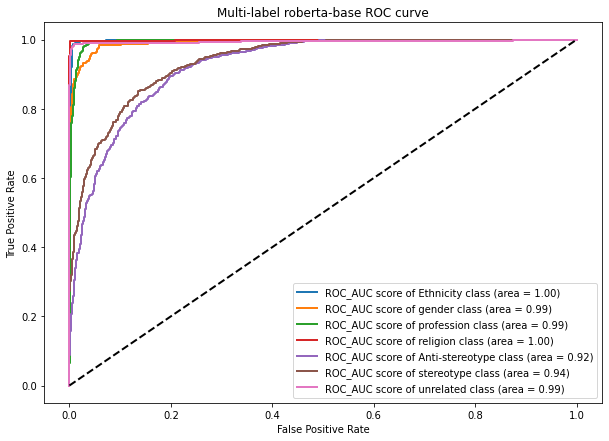

In [38]:
import matplotlib.pyplot as plt

# Plot all ROC curves
plt.figure(figsize=(10,7))
lw = 2

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
LABEL_COLUMNS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']
for i,val in enumerate(LABEL_COLUMNS):
    plt.plot(fpr[i], tpr[i],  lw=lw,
             label='ROC_AUC score of {0} class (area = {1:0.2f})'
             ''.format(val, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-label %s ROC curve' % (MODEL_NAME))
plt.legend(loc="lower right")
plt.show()

#### Classification report

Threshold = 0.5

In [39]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

y_pred = y_pred = np.where(test_pred > 0.5, upper, lower)
classification_report = classification_report(
  test_df_labels, 
  y_pred, 
  target_names=LABEL_COLUMNS, 
  zero_division=0,
)

In [40]:
print(classification_report)

                 precision    recall  f1-score   support

      Ethnicity       0.98      0.98      0.98       784
         gender       0.88      0.90      0.89       304
     profession       0.93      0.94      0.93       467
       religion       0.99      0.99      0.99       293
Anti-stereotype       0.79      0.70      0.74       778
     stereotype       0.80      0.87      0.83      1070
      unrelated       0.99      0.97      0.98       636

      micro avg       0.89      0.89      0.89      4332
      macro avg       0.91      0.91      0.91      4332
   weighted avg       0.89      0.89      0.89      4332
    samples avg       0.90      0.90      0.90      4332



Calculated theshold

In [41]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

y_pred = y_pred = np.where(test_pred > list(opti_threshold.values()), upper, lower)
classification_report = classification_report(
  test_df_labels, 
  y_pred, 
  target_names=LABEL_COLUMNS, 
  zero_division=0
)

In [42]:
print(classification_report)

                 precision    recall  f1-score   support

      Ethnicity       0.98      0.99      0.98       784
         gender       0.70      0.98      0.82       304
     profession       0.88      0.98      0.93       467
       religion       0.99      0.99      0.99       293
Anti-stereotype       0.67      0.90      0.77       778
     stereotype       0.83      0.85      0.84      1070
      unrelated       0.97      0.99      0.98       636

      micro avg       0.84      0.94      0.89      4332
      macro avg       0.86      0.95      0.90      4332
   weighted avg       0.85      0.94      0.89      4332
    samples avg       0.88      0.94      0.91      4332



Plot confusion matrix

In [43]:
pip install git+https://github.com/gmihaila/ml_things

  Cloning https://github.com/gmihaila/ml_things to /tmp/pip-req-build-s9h5s049
  Running command git clone -q https://github.com/gmihaila/ml_things /tmp/pip-req-build-s9h5s049
     |████████████████████████████████| 64 kB 2.3 MB/s 
     |████████████████████████████████| 10.3 MB 27.6 MB/s 
  Created wheel for ml-things: filename=ml_things-0.0.1-py3-none-any.whl size=24382 sha256=3bdf40da1c68ac4c88a53b8ee0262997f4d0f1a5ad5b2fbef91326091772003a
  Stored in directory: /tmp/pip-ephem-wheel-cache-0c4kbxud/wheels/20/45/02/23a7ab529f33a743dcb6b023bd577920a6f01418b11075789d
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=dab52f9acba604ec75df1f696ea2f9b2cd89cb0e0887f8512a67c1b9877fd757
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ml-things ftfy
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully u

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from ml_things import plot_confusion_matrix

cf = multilabel_confusion_matrix(test_df_labels, 
  y_pred)

Confusion matrix, without normalization


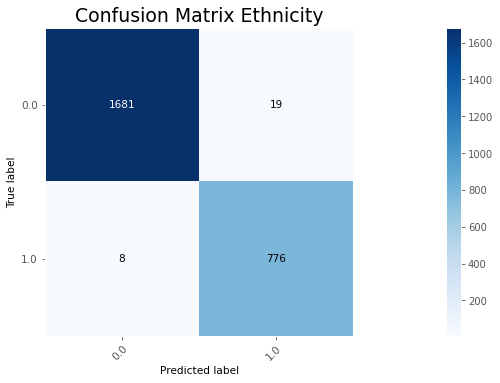

Confusion matrix, without normalization


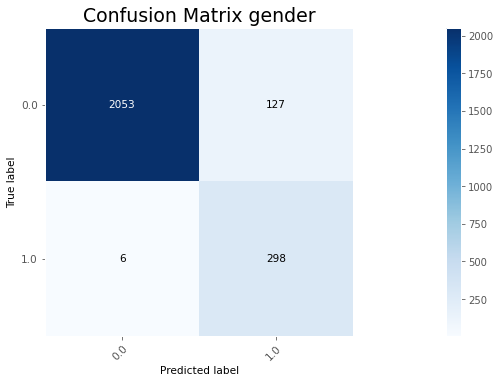

Confusion matrix, without normalization


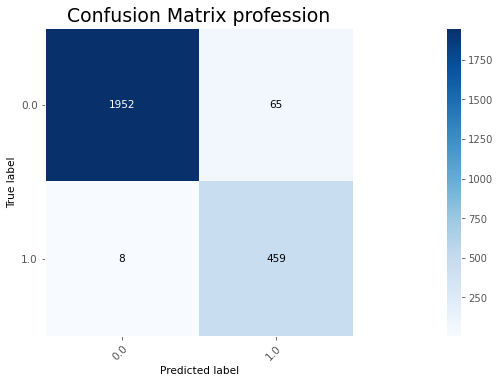

Confusion matrix, without normalization


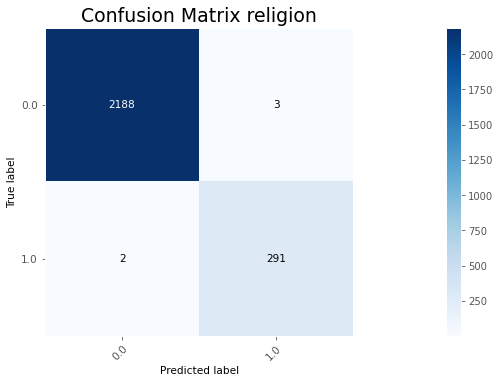

Confusion matrix, without normalization


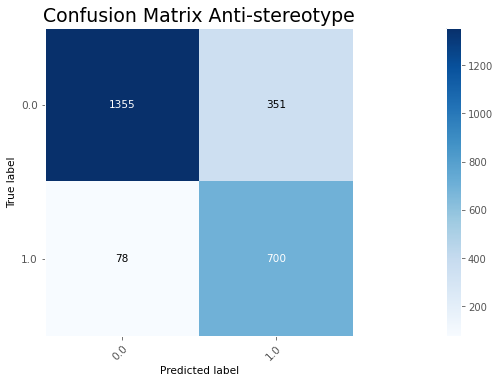

Confusion matrix, without normalization


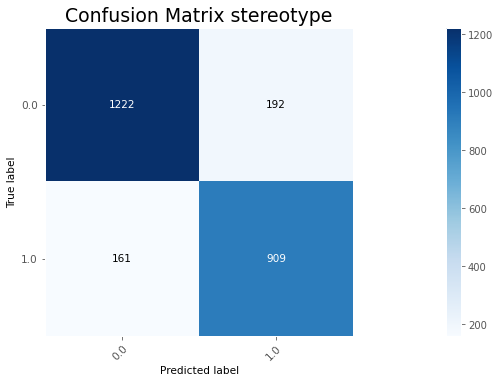

Confusion matrix, without normalization


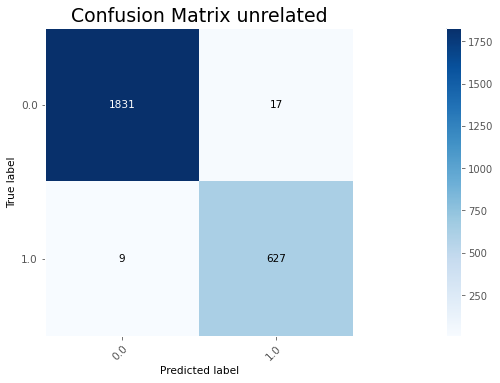

In [45]:
LABEL_COLUMNS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']
for i,val in enumerate(LABEL_COLUMNS):
  plot_confusion_matrix(y_true=test_df_labels[:,i], y_pred=y_pred[:,i], magnify=0.1, use_title='Confusion Matrix'+" "+ val, path='plot_confusion_matrix'+ "_" + val +".png");

#### Classification metrics

Threshold = 0.5

In [49]:
classification_metrics(test_pred, test_df_labels,"RoBERTa",0.5)

Evaluation metrics for test set:

 ROC-AUC score: 0.977259 


 Subset accuracy : 0.818841 


 hamming_loss : 0.053888 


 hamming score : 0.874832 


 sample average  precision_sample_average : 0.902442 


 sample average  recall_sample_average : 0.901369 


 sample average  f1_sample_average : 0.901208 

  Saving the metrics into a file: eval_results_RoBERTa_0.5_.json with threshold :0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Threshold = list(opti_threshold.values())

In [ ]:
classification_metrics(test_pred, test_df_labels,"RoBERTa",list(opti_threshold.values()))

## BERT - Base

In [50]:
# Number of epochs 
N_EPOCHS = 2

# Batch_size 
BATCH_SIZE = 32

# Model name 
MODEL_NAME = 'bert-base-uncased'

# Learning rate 
learning_rate = 2.49816047538945e-05

### Training 

In [51]:
MODEL_NAME = 'bert-base-uncased'

transformer_model = text.Transformer(MODEL_NAME, maxlen= 100,class_names= LABELS)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [52]:
train = transformer_model.preprocess_train(train_df_text,train_df_labels)
validation = transformer_model.preprocess_test(val_df_text,val_df_labels)
test = transformer_model.preprocess_test(test_df_text,test_df_labels)

preprocessing train...
language: en
train sequence lengths:
	mean : 12
	95percentile : 24
	99percentile : 33


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Is Multi-Label? True
preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 25
	99percentile : 35


preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 24
	99percentile : 36


In [53]:
trans_classifier = transformer_model.get_classifier()

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Focal loss to handle class imbalance 

Link: https://github.com/amaiya/ktrain/blob/master/FAQ.md

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import activations
# def focal_loss(gamma=2., alpha=4., from_logits=False):

#     gamma = float(gamma)
#     alpha = float(alpha)

#     def focal_loss_fixed(y_true, y_pred):
#         """Focal loss for multi-classification
#         FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)
#         Notice: y_pred is probability after softmax if from_logits is False.
#         gradient is d(Fl)/d(p_t) not d(Fl)/d(x) as described in paper
#         d(Fl)/d(p_t) * [p_t(1-p_t)] = d(Fl)/d(x)
#         Focal Loss for Dense Object Detection
#         https://arxiv.org/abs/1708.02002

#         Arguments:
#             y_true {tensor} -- ground truth labels, shape of [batch_size, num_cls]
#             y_pred {tensor} -- model's output, shape of [batch_size, num_cls]

#         Keyword Arguments:
#             gamma {float} -- (default: {2.0})
#             alpha {float} -- (default: {4.0})

#         Returns:
#             [tensor] -- loss.
#         """
#         epsilon = 1.e-9
#         y_true = tf.cast(y_true, dtype=tf.float32)
#         y_pred = tf.cast(y_pred, dtype=tf.float32)
#         if from_logits:
#             y_pred = activations.softmax(y_pred)

#         model_out = tf.add(y_pred, epsilon)
#         ce = tf.multiply(y_true, -tf.math.log(model_out))
#         weight = tf.multiply(y_true, tf.pow(tf.subtract(1., model_out), gamma))
#         fl = tf.multiply(alpha, tf.multiply(weight, ce))
#         reduced_fl = tf.reduce_max(fl, axis=1)
#         return tf.reduce_mean(reduced_fl)
#     return focal_loss_fixed

In [ ]:
# trans_classifier.compile(loss=focal_loss(alpha=1, from_logits=True),
#               optimizer='adam',
#               metrics=['accuracy'])

In [54]:
learner = ktrain.get_learner(trans_classifier,train_data = train,val_data= validation, batch_size= BATCH_SIZE)

In [55]:
learner.fit_onecycle(learning_rate, N_EPOCHS)



begin training using onecycle policy with max lr of 2.49816047538945e-05...
Epoch 1/2


/usr/lib/python3.7/logging/__init__.py:8: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  # not be used in advertising or publicity pertaining to distribution
/usr/lib/python3.7/logging/__init__.py:8: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  # not be used in advertising or publicity pertaining to distribution
/usr/lib/python3.7/logging/__init__.py:8: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  # not be used in advertising or publicity pertaining to distribution
/usr/lib/python3.7/logging/__init__.py:8: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  # not be used in advertising or publicity pertaining to distribution


363/363 [==============================] - ETA: 0s - loss: 0.4116 - accuracy: 0.4972

/usr/lib/python3.7/logging/__init__.py:8: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  # not be used in advertising or publicity pertaining to distribution
/usr/lib/python3.7/logging/__init__.py:8: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  # not be used in advertising or publicity pertaining to distribution


363/363 [==============================] - 472s 1s/step - loss: 0.4116 - accuracy: 0.4972 - val_loss: 0.2285 - val_accuracy: 0.7782
Epoch 2/2
363/363 [==============================] - 455s 1s/step - loss: 0.1890 - accuracy: 0.8256 - val_loss: 0.1785 - val_accuracy: 0.8084


In [56]:
predictor = ktrain.get_predictor(learner.model,preproc=transformer_model)

In [57]:
predictor.save('/content/drive/MyDrive/Trained_models/mult_label_dataset/Unrelated_samples_adjusted/Ktrain_Roberta_Bert/%s'% (MODEL_NAME))

In [58]:
predictor.predict("asians are good in math")

/usr/lib/python3.7/logging/__init__.py:8: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  # not be used in advertising or publicity pertaining to distribution
/usr/lib/python3.7/logging/__init__.py:8: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  # not be used in advertising or publicity pertaining to distribution


[('Ethnicity', 0.9738713),
 ('gender', 0.019035747),
 ('profession', 0.01710283),
 ('religion', 0.01276314),
 ('Anti-stereotype', 0.5240458),
 ('stereotype', 0.41224906),
 ('unrelated', 0.026619364)]

### Evaluation Metrics

Threshold :
  * When using sigmoid activation function, the values range of [0,1], as a rule of thumb 0.5 is used as threshold

1. AUC_ROC
  * Per class auc score 
  * Determine threshold using `auc_roc` metric
2. Accuracy (subset accuracy/ Exact match accuracy):
  * Avoids partial matches in the case of multi-label classification 
3. Hamming loss : Fraction/average of correctly predicted labels (per label, per class total correct predictions).
4. Classification report with threshold 


#### ROC_AUC_Score (validation set)

In [59]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(val_df_labels, learner.predict())
print("\n ROC-AUC score: %.6f \n" % (score))


 ROC-AUC score: 0.956431 



In [60]:
val_pred = learner.predict()
val_labels = val_df_labels

In [62]:
write_to_file = True
classification_metrics(val_pred,val_labels,MODEL_NAME,0.5)

Evaluation metrics for test set:

 ROC-AUC score: 0.503001 


 Subset accuracy : 0.699678 


 hamming_loss : 0.081608 


 hamming score : 0.807267 


 sample average  precision_sample_average : 0.855408 


 sample average  recall_sample_average : 0.854267 


 sample average  f1_sample_average : 0.850913 

  Saving the metrics into a file: eval_results_bert-base-uncased_0.5_.json with threshold :0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### ROC (test set)

In [63]:
test_pred = predictor.predict(test_df_text, return_proba= True)

##### Per-class ROC_AUC 

In [64]:
from sklearn.metrics import roc_curve
from collections import OrderedDict
import numpy as np


opti_threshold = dict()
LABEL_COLUMNS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']

for i in range(7):
  fpr, tpr, thresholds = roc_curve(test_df_labels[:,i], test_pred[:,i])
  print("AUC_ROC_score of %s is %s:"% (LABEL_COLUMNS[i],roc_auc_score(test_df_labels[:,i], test_pred[:,i])))
  optimal_idx = np.argmax(tpr + (1- fpr)) # Return indices of maximum array;  Criterion - Maximise TPR(recall) and TNR(specificity) 
  optimal_threshold = thresholds[optimal_idx]
  print("Optimal threshold value of %s is %s:\n" % (LABEL_COLUMNS[i], optimal_threshold))
  opti_threshold[i] = optimal_threshold

AUC_ROC_score of Ethnicity is 0.9969575330132052:
Optimal threshold value of Ethnicity is 0.6490079:

AUC_ROC_score of gender is 0.9866082206663447:
Optimal threshold value of gender is 0.12038912:

AUC_ROC_score of profession is 0.9914750318226552:
Optimal threshold value of profession is 0.2423434:

AUC_ROC_score of religion is 0.9980263660055174:
Optimal threshold value of religion is 0.35249132:

AUC_ROC_score of Anti-stereotype is 0.8791924464388503:
Optimal threshold value of Anti-stereotype is 0.28664047:

AUC_ROC_score of stereotype is 0.8960825655329218:
Optimal threshold value of stereotype is 0.4429227:

AUC_ROC_score of unrelated is 0.9900521386370442:
Optimal threshold value of unrelated is 0.16666211:



##### ROC curve

In [65]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
thresholds = dict()
for i in range(7):
    fpr[i], tpr[i], thresholds[i] = roc_curve(test_df_labels[:, i], test_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

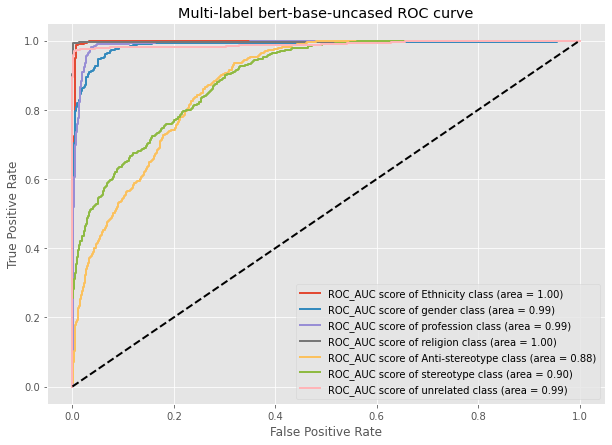

In [66]:
import matplotlib.pyplot as plt

# Plot all ROC curves
plt.figure(figsize=(10,7))
lw = 2

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
LABEL_COLUMNS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']
for i,val in enumerate(LABEL_COLUMNS):
    plt.plot(fpr[i], tpr[i],  lw=lw,
             label='ROC_AUC score of {0} class (area = {1:0.2f})'
             ''.format(val, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-label %s ROC curve' % (MODEL_NAME))
plt.legend(loc="lower right")
plt.show()

#### Classification report

Threshold = 0.5

In [67]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

y_pred = y_pred = np.where(test_pred > 0.5, upper, lower)
classification_report = classification_report(
  test_df_labels, 
  y_pred, 
  target_names=LABEL_COLUMNS, 
  zero_division=0,
  # output_dict=True,
)

In [68]:
print(classification_report)

                 precision    recall  f1-score   support

      Ethnicity       0.98      0.99      0.98       784
         gender       0.90      0.82      0.86       304
     profession       0.90      0.93      0.91       467
       religion       0.99      0.99      0.99       293
Anti-stereotype       0.67      0.60      0.63       778
     stereotype       0.72      0.80      0.76      1070
      unrelated       0.99      0.96      0.98       636

      micro avg       0.85      0.85      0.85      4332
      macro avg       0.88      0.87      0.87      4332
   weighted avg       0.85      0.85      0.85      4332
    samples avg       0.87      0.87      0.86      4332



Calculated theshold

In [69]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

y_pred = y_pred = np.where(test_pred > list(opti_threshold.values()), upper, lower)
classification_report = classification_report(
  test_df_labels, 
  y_pred, 
  target_names=LABEL_COLUMNS, 
  zero_division=0
)

In [70]:
print(classification_report)

                 precision    recall  f1-score   support

      Ethnicity       0.98      0.99      0.99       784
         gender       0.64      0.97      0.77       304
     profession       0.86      0.98      0.92       467
       religion       0.99      0.99      0.99       293
Anti-stereotype       0.57      0.93      0.71       778
     stereotype       0.69      0.90      0.78      1070
      unrelated       0.99      0.97      0.98       636

      micro avg       0.77      0.95      0.85      4332
      macro avg       0.82      0.96      0.88      4332
   weighted avg       0.80      0.95      0.86      4332
    samples avg       0.83      0.95      0.88      4332



#### Plot confusion matrix

In [71]:
pip install git+https://github.com/gmihaila/ml_things

  Cloning https://github.com/gmihaila/ml_things to /tmp/pip-req-build-owqz70nq
  Running command git clone -q https://github.com/gmihaila/ml_things /tmp/pip-req-build-owqz70nq


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from ml_things import plot_confusion_matrix

# Threshold = 0.5
y_pred = y_pred = np.where(test_pred > 0.5, upper, lower)
cf = multilabel_confusion_matrix(test_df_labels, 
  y_pred)

In [73]:
test_df_labels[:,1]

array([0., 0., 0., ..., 0., 0., 0.])

Confusion matrix, without normalization


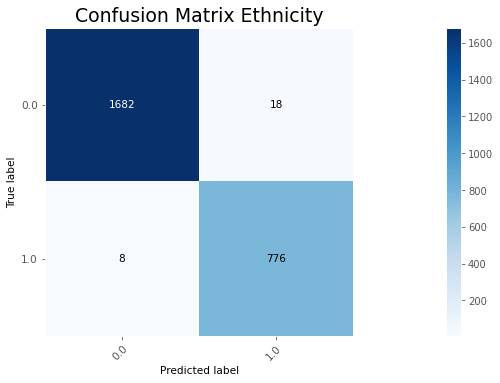

Confusion matrix, without normalization


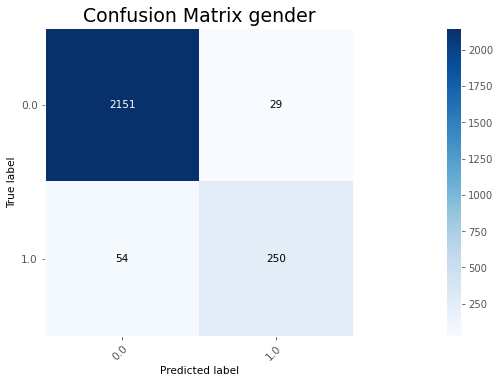

Confusion matrix, without normalization


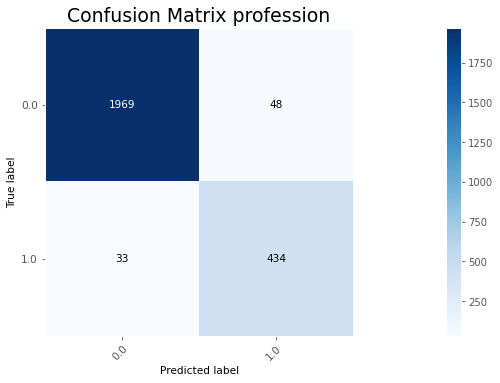

Confusion matrix, without normalization


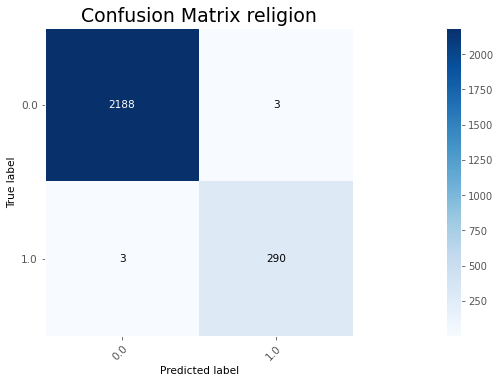

Confusion matrix, without normalization


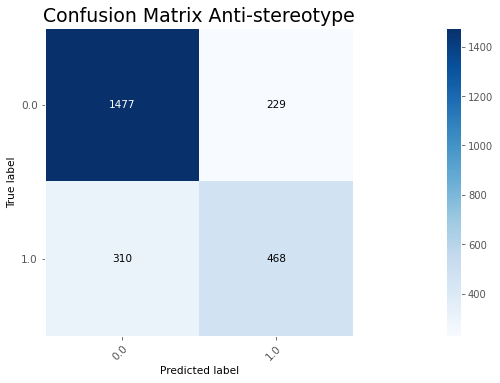

Confusion matrix, without normalization


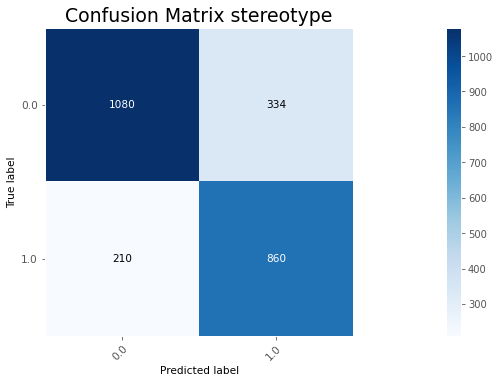

Confusion matrix, without normalization


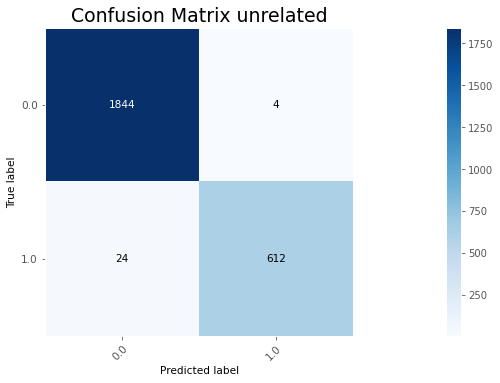

In [74]:
LABEL_COLUMNS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']
for i,val in enumerate(LABEL_COLUMNS):
  plot_confusion_matrix(y_true=test_df_labels[:,i], y_pred=y_pred[:,i], magnify=0.1, use_title='Confusion Matrix'+" "+ val, path='plot_confusion_matrix'+ "_" + val +".png");

#### Classification metrics

Threshold = 0.5

In [78]:
classification_metrics(test_pred, test_df_labels,MODEL_NAME,0.5)

Evaluation metrics for test set:

 ROC-AUC score: 0.962628 


 Subset accuracy : 0.713768 


 hamming_loss : 0.075167 


 hamming score : 0.820048 


 sample average  precision_sample_average : 0.866613 


 sample average  recall_sample_average : 0.865942 


 sample average  f1_sample_average : 0.862413 

  Saving the metrics into a file: eval_results_bert-base-uncased_0.5_.json with threshold :0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Threshold = list(opti_threshold.values())

In [79]:
classification_metrics(test_pred, test_df_labels,"BERT",list(opti_threshold.values()))

Evaluation metrics for test set:

 ROC-AUC score: 0.962628 


 Subset accuracy : 0.573671 


 hamming_loss : 0.083103 


 hamming score : 0.817834 


 sample average  precision_sample_average : 0.828570 


 sample average  recall_sample_average : 0.953704 


 sample average  f1_sample_average : 0.876771 

  Saving the metrics into a file: eval_results_BERT_calculated_threshold_.json with threshold :[0.6490079, 0.12038912, 0.2423434, 0.35249132, 0.28664047, 0.4429227, 0.16666211]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
